In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Zomato data .csv")

# Clean 'rate' column
df['rate'] = df['rate'].str.replace('/5', '', regex=False)
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

# Clean 'approx_cost(for two people)' column
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str).str.replace(',', '', regex=False)
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce')

# Rename columns
df.rename(columns={
    'approx_cost(for two people)': 'approx_cost',
    'listed_in(type)': 'restaurant_type'
}, inplace=True)

# Drop missing key values
df.dropna(subset=['rate', 'votes', 'approx_cost', 'restaurant_type'], inplace=True)

# Use seaborn theme
sns.set(style="whitegrid")

# 1.what type of restaurant do the majority of customers order from?

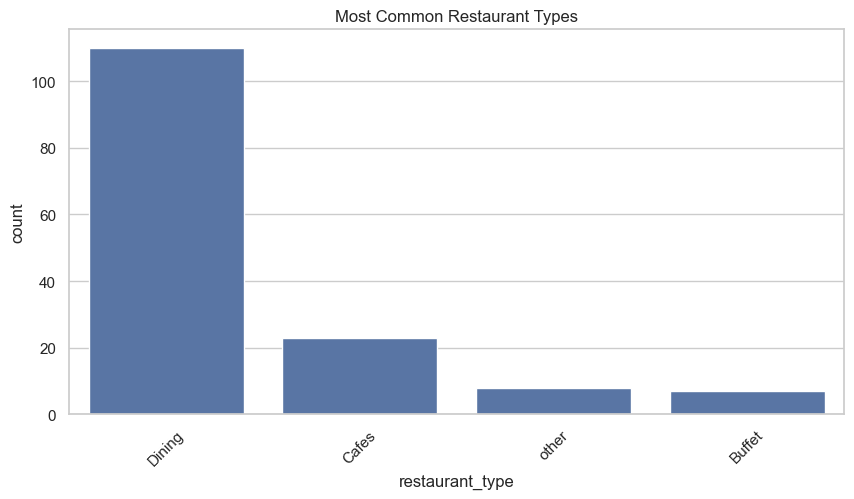

In [3]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='restaurant_type', order=df['restaurant_type'].value_counts().index)
plt.title("Most Common Restaurant Types")
plt.xticks(rotation=45)
plt.show()

# 2.How many votes has each type of restaurant received from customers?

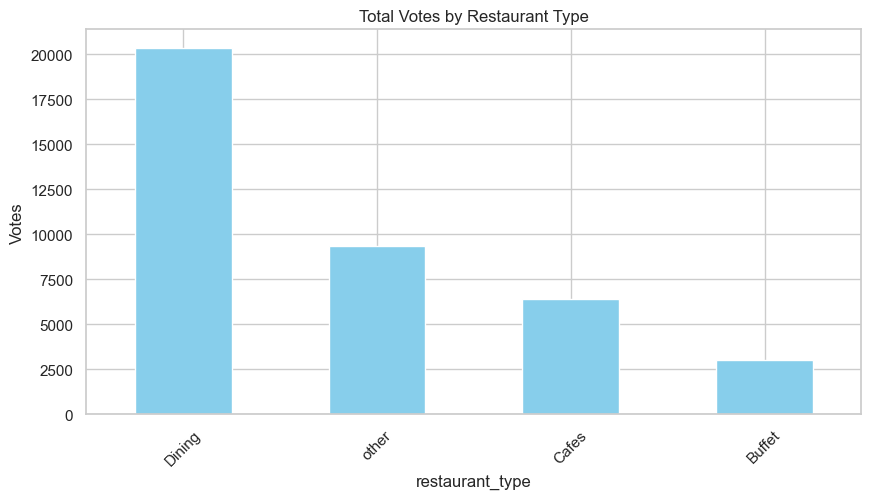

In [4]:
votes_by_type = df.groupby('restaurant_type')['votes'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
votes_by_type.plot(kind='bar', color='skyblue')
plt.title("Total Votes by Restaurant Type")
plt.ylabel("Votes")
plt.xticks(rotation=45)
plt.show()

# 3.What are the ratings that the majority of restaurants have received ?

plt.figure(figsize=(8, 5))
sns.histplot(df['rate'], bins=10, kde=True)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.show()

#  4.zomato has observed that most couples order most of their food online, what is their average spending on each other? 


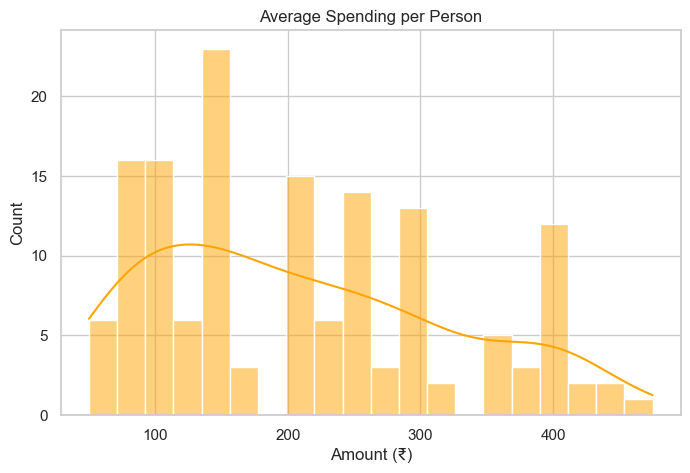

In [7]:
plt.figure(figsize=(8, 5))
sns.histplot(df['approx_cost'] / 2, bins=20, color='orange', kde=True)
plt.title("Average Spending per Person")
plt.xlabel("Amount (₹)")
plt.show()

# 5.Which mode (online or offline) has received the maximum rating?

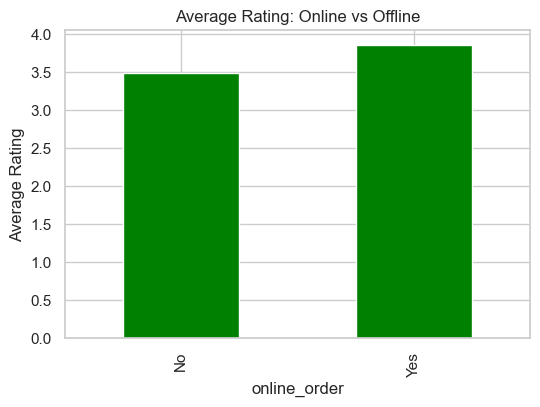

In [8]:
rating_by_mode = df.groupby('online_order')['rate'].mean()

plt.figure(figsize=(6, 4))
rating_by_mode.plot(kind='bar', color='green')
plt.title("Average Rating: Online vs Offline")
plt.ylabel("Average Rating")
plt.show()

# 6. Which type of restaurant received more offline orders, so that zomato can give customers with some good offers?

C:\Users\lenovo\AppData\Local\Temp\ipykernel_23472\3126135780.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=offline_orders, x='restaurant_type',


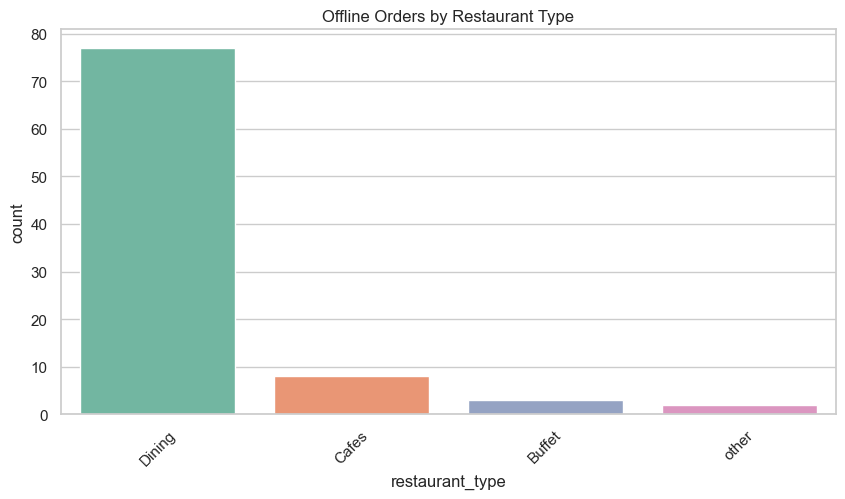

In [10]:
offline_orders = df[df['online_order'] == 'No']

plt.figure(figsize=(10, 5))
sns.countplot(data=offline_orders, x='restaurant_type',
              order=offline_orders['restaurant_type'].value_counts().index,
              palette='Set2')
plt.title("Offline Orders by Restaurant Type")
plt.xticks(rotation=45)
plt.show()